##FAKE NEWS DETECTION

This project aims to find whether the news is real or fake uisng Machine learning models. It takes the text message(news) as input and gives a string value REAL or FAKE.

#PROJECT STEPS

######1.PROBLEM STATEMENT 
######2.IMPORTING REQUIRED PACKAGES 
######3.PRE PROCESS THE DATA 
######4.VISUALIZING RELATIONSHIP 
######5.MODELLING 
######6.COMPARING ACCURACY 
######7.STORE THE MODEL

#Importing packages

In [1]:
import pandas as pd
import numpy as np
df=pd.read_csv("news.csv")
df.head()

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


In [2]:
df.tail()

,Unnamed: 0,title,text,label
6330,4490,State Department says it can't find emails fro...,The State Department told the Republican Natio...,REAL
6331,8062,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,FAKE
6332,8622,Anti-Trump Protesters Are Tools of the Oligarc...,Anti-Trump Protesters Are Tools of the Oligar...,FAKE
6333,4021,"In Ethiopia, Obama seeks progress on peace, se...","ADDIS ABABA, Ethiopia —President Obama convene...",REAL
6334,4330,Jeb Bush Is Suddenly Attacking Trump. Here's W...,Jeb Bush Is Suddenly Attacking Trump. Here's W...,REAL


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6335 entries, 0 to 6334
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  6335 non-null   int64 
 1   title       6335 non-null   object
 2   text        6335 non-null   object
 3   label       6335 non-null   object
dtypes: int64(1), object(3)
memory usage: 198.1+ KB


In [4]:
df.describe()

,Unnamed: 0
count,6335.000000
mean,5280.415627
std,3038.503953
min,2.000000
25%,2674.500000
50%,5271.000000
75%,7901.000000
max,10557.000000


In [5]:
df.nunique()

Unnamed: 0    6335
title         6256
text          6060
label            2
dtype: int64

In [6]:
df.columns

Index(['Unnamed: 0', 'title', 'text', 'label'], dtype='object')

In [7]:
df.shape

(6335, 4)

In [8]:
df['text'].value_counts

<bound method IndexOpsMixin.value_counts of 0       Daniel Greenfield, a Shillman Journalism Fello...
1       Google Pinterest Digg Linkedin Reddit Stumbleu...
2       U.S. Secretary of State John F. Kerry said Mon...
3       — Kaydee King (@KaydeeKing) November 9, 2016 T...
4       It's primary day in New York and front-runners...
                              ...                        
6330    The State Department told the Republican Natio...
6331    The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...
6332     Anti-Trump Protesters Are Tools of the Oligar...
6333    ADDIS ABABA, Ethiopia —President Obama convene...
6334    Jeb Bush Is Suddenly Attacking Trump. Here's W...
Name: text, Length: 6335, dtype: object>

In [9]:
num_of_msgs=len(df['text'].unique())
print("Number of news in dataset:",num_of_msgs)

Number of news in dataset: 6060


#PREPROCESSING

In [10]:
df.isnull().sum()

Unnamed: 0    0
title         0
text          0
label         0
dtype: int64

In [11]:
df.label.value_counts()

REAL    3171
FAKE    3164
Name: label, dtype: int64

In [12]:
df.dropna()

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL
...,...,...,...,...
6330,4490,State Department says it can't find emails fro...,The State Department told the Republican Natio...,REAL
6331,8062,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,FAKE
6332,8622,Anti-Trump Protesters Are Tools of the Oligarc...,Anti-Trump Protesters Are Tools of the Oligar...,FAKE
6333,4021,"In Ethiopia, Obama seeks progress on peace, se...","ADDIS ABABA, Ethiopia —President Obama convene...",REAL


In [13]:
df.columns=['Index','Title','Text','Label']
df.columns

Index(['Index', 'Title', 'Text', 'Label'], dtype='object')

In [14]:
#dropping the index column
df.drop('Index',axis=1,inplace=True)
df.columns

Index(['Title', 'Text', 'Label'], dtype='object')

In [15]:
#dropping the title column
df.drop('Title',axis=1,inplace=True)
df.columns

Index(['Text', 'Label'], dtype='object')

In [16]:
df['Text']

0       Daniel Greenfield, a Shillman Journalism Fello...
1       Google Pinterest Digg Linkedin Reddit Stumbleu...
2       U.S. Secretary of State John F. Kerry said Mon...
3       — Kaydee King (@KaydeeKing) November 9, 2016 T...
4       It's primary day in New York and front-runners...
                              ...                        
6330    The State Department told the Republican Natio...
6331    The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...
6332     Anti-Trump Protesters Are Tools of the Oligar...
6333    ADDIS ABABA, Ethiopia —President Obama convene...
6334    Jeb Bush Is Suddenly Attacking Trump. Here's W...
Name: Text, Length: 6335, dtype: object

In [17]:
#converting the text into lower case
df['Text']=df['Text'].str.lower()
df.head()

,Text,Label
0,"daniel greenfield, a shillman journalism fello...",FAKE
1,google pinterest digg linkedin reddit stumbleu...,FAKE
2,u.s. secretary of state john f. kerry said mon...,REAL
3,"— kaydee king (@kaydeeking) november 9, 2016 t...",FAKE
4,it's primary day in new york and front-runners...,REAL


In [18]:
#removing the hyper links in the text
df['Text']=df['Text'].str.replace(r'https\S+','',regex=True)
df.head()

,Text,Label
0,"daniel greenfield, a shillman journalism fello...",FAKE
1,google pinterest digg linkedin reddit stumbleu...,FAKE
2,u.s. secretary of state john f. kerry said mon...,REAL
3,"— kaydee king (@kaydeeking) november 9, 2016 t...",FAKE
4,it's primary day in new york and front-runners...,REAL


In [19]:
#removing special characters from the text
df['Text']=df['Text'].str.replace('[^A-Za-z\s]+', '',regex=True)
df.head()

,Text,Label
0,daniel greenfield a shillman journalism fellow...,FAKE
1,google pinterest digg linkedin reddit stumbleu...,FAKE
2,us secretary of state john f kerry said monday...,REAL
3,kaydee king kaydeeking november the lesson ...,FAKE
4,its primary day in new york and frontrunners h...,REAL


In [20]:
df.shape

(6335, 2)

In [21]:
import nltk
from nltk.corpus import stopwords

In [22]:
sw=stopwords.words('english')

In [23]:
#removing the stopwords from the text
df['Text']=df['Text'].apply(lambda words:' '.join(word.lower() for word in words.split() if word not in sw))
df.head()

,Text,Label
0,daniel greenfield shillman journalism fellow f...,FAKE
1,google pinterest digg linkedin reddit stumbleu...,FAKE
2,us secretary state john f kerry said monday st...,REAL
3,kaydee king kaydeeking november lesson tonight...,FAKE
4,primary day new york frontrunners hillary clin...,REAL


In [24]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\bandh\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [25]:
#dividing the text into tokens - tokenization
t=nltk.tokenize.WhitespaceTokenizer()
l=nltk.stem.WordNetLemmatizer()
def lt(text):
    return [l.lemmatize(w) for w in t.tokenize(text)]
df['Tokens']=df['Text'].apply(lt)
df.head()

,Text,Label,Tokens
0,daniel greenfield shillman journalism fellow f...,FAKE,"[daniel, greenfield, shillman, journalism, fel..."
1,google pinterest digg linkedin reddit stumbleu...,FAKE,"[google, pinterest, digg, linkedin, reddit, st..."
2,us secretary state john f kerry said monday st...,REAL,"[u, secretary, state, john, f, kerry, said, mo..."
3,kaydee king kaydeeking november lesson tonight...,FAKE,"[kaydee, king, kaydeeking, november, lesson, t..."
4,primary day new york frontrunners hillary clin...,REAL,"[primary, day, new, york, frontrunners, hillar..."


In [26]:
#wordlength- count of no.of tokens 
df['word_length']=df['Text'].str.split().str.len()
df.head()

,Text,Label,Tokens,word_length
0,daniel greenfield shillman journalism fellow f...,FAKE,"[daniel, greenfield, shillman, journalism, fel...",679
1,google pinterest digg linkedin reddit stumbleu...,FAKE,"[google, pinterest, digg, linkedin, reddit, st...",235
2,us secretary state john f kerry said monday st...,REAL,"[u, secretary, state, john, f, kerry, said, mo...",242
3,kaydee king kaydeeking november lesson tonight...,FAKE,"[kaydee, king, kaydeeking, november, lesson, t...",237
4,primary day new york frontrunners hillary clin...,REAL,"[primary, day, new, york, frontrunners, hillar...",181


In [27]:
df.drop_duplicates(subset='Text',inplace=True)

In [28]:
df.shape

(6046, 4)

In [29]:
df.head()

,Text,Label,Tokens,word_length
0,daniel greenfield shillman journalism fellow f...,FAKE,"[daniel, greenfield, shillman, journalism, fel...",679
1,google pinterest digg linkedin reddit stumbleu...,FAKE,"[google, pinterest, digg, linkedin, reddit, st...",235
2,us secretary state john f kerry said monday st...,REAL,"[u, secretary, state, john, f, kerry, said, mo...",242
3,kaydee king kaydeeking november lesson tonight...,FAKE,"[kaydee, king, kaydeeking, november, lesson, t...",237
4,primary day new york frontrunners hillary clin...,REAL,"[primary, day, new, york, frontrunners, hillar...",181


#VISUALIZATION

In [30]:
df['Label'].value_counts()

FAKE    3057
REAL    2989
Name: Label, dtype: int64

<AxesSubplot:>

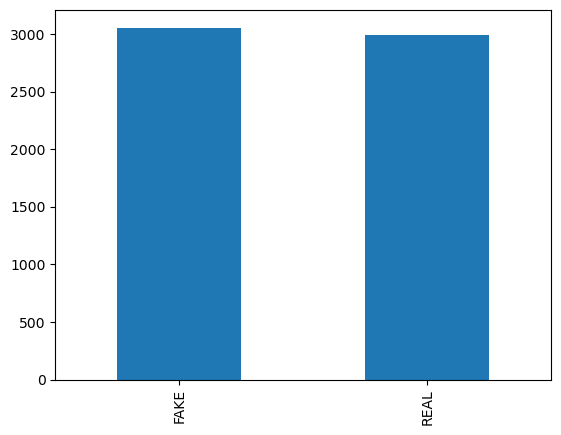

In [31]:
df['Label'].value_counts().plot.bar()

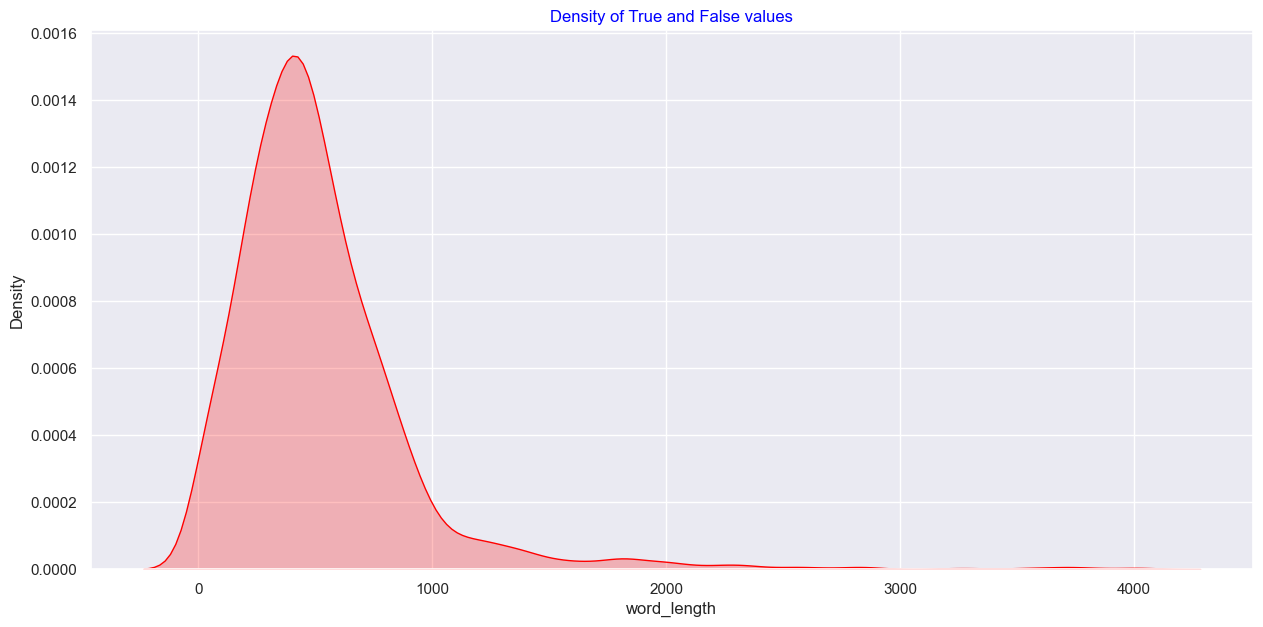

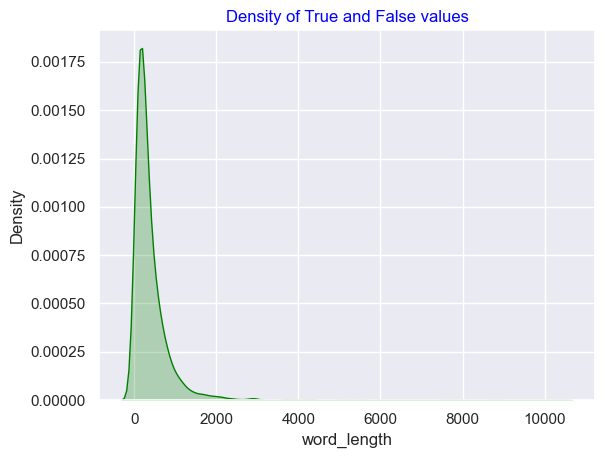

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(color_codes=True)
plt.figure(figsize=(15,7))
cmap=['red','green']
labels=['REAL','FAKE']
for label,clr in zip(labels,cmap):
    sns.kdeplot(df.loc[(df['Label']==label),'word_length'],color=clr,shade=True,label=label)
    plt.title("Density of True and False values",color="Blue")
    plt.show()

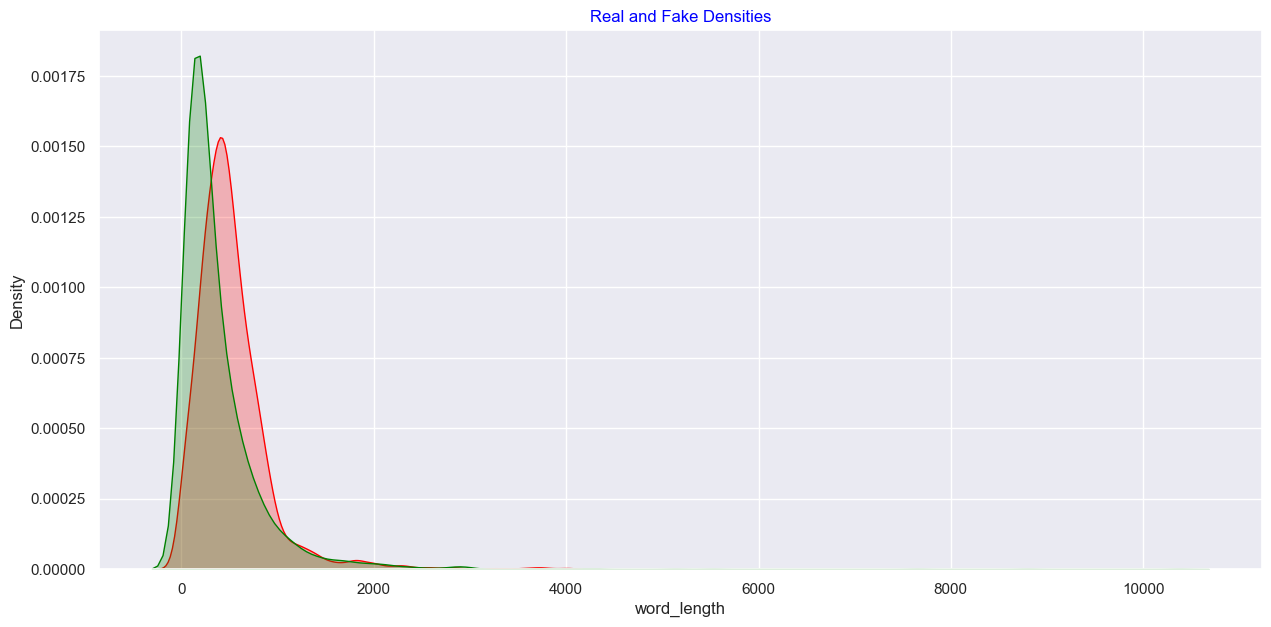

In [33]:
sns.set(color_codes=True)
plt.figure(figsize=(15,7))
cmap=['red','green']
labels=['REAL','FAKE']
for label,clr in zip(labels,cmap):
    sns.kdeplot(df.loc[(df['Label']==label),'word_length'],color=clr,shade=True,label=label)
    plt.title("Real and Fake Densities",color="Blue")
plt.show()

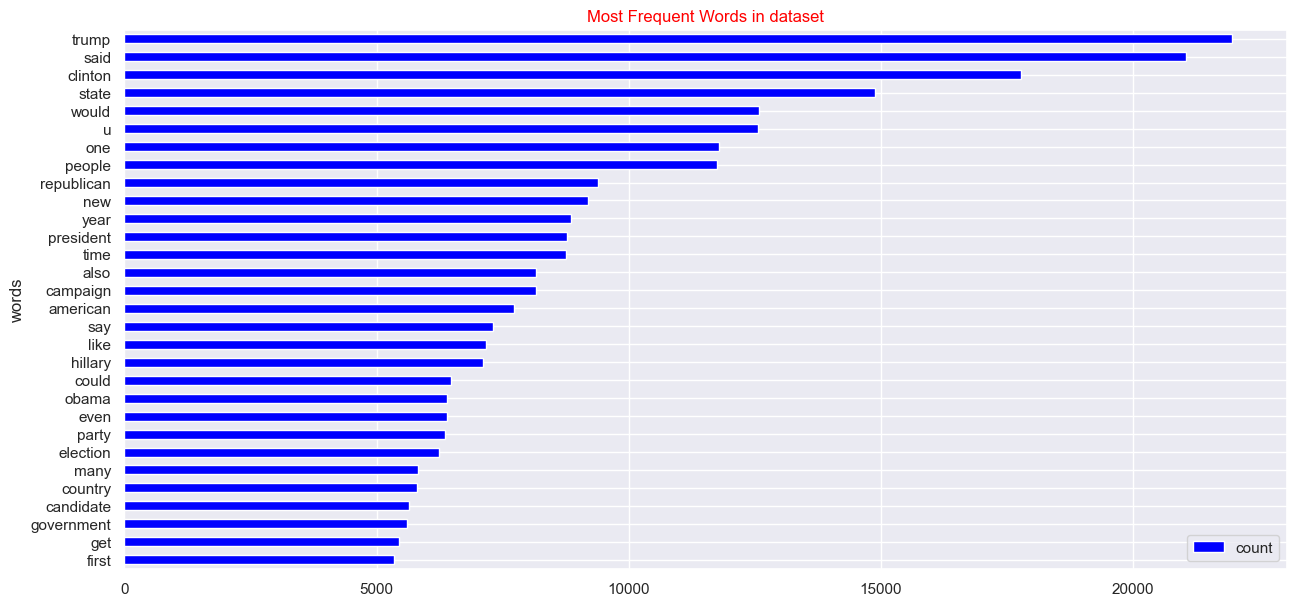

In [34]:
import itertools
import collections
import pandas as pd
lt=list(df['Tokens'])
t=list(itertools.chain(*lt))
c=collections.Counter(t)
d=pd.DataFrame(c.most_common(30),columns=['words','count'])
fig,ax=plt.subplots(figsize=(15,7))
d.sort_values(by='count').plot.barh(x='words',y='count',ax=ax,color='blue')
plt.title("Most Frequent Words in dataset",color="Red")
plt.show()

In [35]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [36]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [37]:
text = " ".join(" ".join(tokens) for tokens in df.Tokens)
word_cloud = WordCloud(collocations = False, background_color = 'white').generate(text)

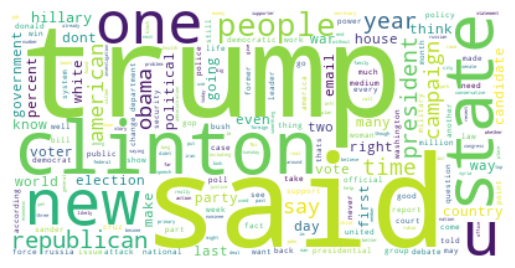

In [38]:
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis("off")
plt.show()

#Splitting Data

In [39]:
x=df.iloc[:,0].values
y=df.iloc[:,1].values

In [40]:
print(x)

['daniel greenfield shillman journalism fellow freedom center new york writer focusing radical islam final stretch election hillary rodham clinton gone war fbi word unprecedented thrown around often election ought retired still unprecedented nominee major political party go war fbi thats exactly hillary people done coma patients waking watching hour cnn hospital beds would assume fbi director james comey hillarys opponent election fbi attack everyone obama cnn hillarys people circulated letter attacking comey currently media hit pieces lambasting targeting trump wouldnt surprising clintons allies start running attack ads fbi fbis leadership warned entire leftwing establishment form lynch mob continue going hillary fbis credibility attacked media democrats preemptively head results investigation clinton foundation hillary clinton covert struggle fbi agents obamas doj people gone explosively public new york times compared comey j edgar hoover bizarre headline james comey role recalls hoo

In [41]:
print(y)

['FAKE' 'FAKE' 'REAL' ... 'FAKE' 'REAL' 'REAL']


#LOGISTIC REGRESSION

In [42]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [43]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=23)

TEXT TO NUMERICS

In [44]:
#TFIDF used to convert into numerics 
from sklearn.feature_extraction.text import TfidfVectorizer 
vectorization = TfidfVectorizer() 
x_train = vectorization.fit_transform(x_train) 
x_test = vectorization.transform(x_test)

In [45]:
print(x_train)

  (0, 46779)	0.1765119970336506
  (0, 10081)	0.23793781423864435
  (0, 23575)	0.15854794447636172
  (0, 65824)	0.21443503540506417
  (0, 65810)	0.1477182745395601
  (0, 66452)	0.14910425436196884
  (0, 24305)	0.18735711365180693
  (0, 71237)	0.1287011231039346
  (0, 72538)	0.30810503260665983
  (0, 50894)	0.38972419788954665
  (0, 70208)	0.27947166651154326
  (0, 1246)	0.1536641198208433
  (0, 15626)	0.14259028721981087
  (0, 73125)	0.1725124766779204
  (0, 6259)	0.36034386831597126
  (0, 37706)	0.4657454865402276
  (1, 70529)	0.03023746246486645
  (1, 20493)	0.05572428646314519
  (1, 33829)	0.07436739772801348
  (1, 43552)	0.0222836638178696
  (1, 61571)	0.07647475299882103
  (1, 51869)	0.04435403435340545
  (1, 729)	0.03232277818236718
  (1, 53401)	0.03468674784590362
  (1, 49974)	0.02661649394592063
  :	:
  (4835, 36533)	0.012599367280301373
  (4835, 48330)	0.03917931614515292
  (4835, 4051)	0.026553923024109347
  (4835, 67721)	0.027769852760547248
  (4835, 40838)	0.0151061435129445

In [46]:
print(x_test)

  (0, 73654)	0.02334761601433896
  (0, 73653)	0.03293592750129156
  (0, 73554)	0.018268472122348566
  (0, 73108)	0.023747679261358182
  (0, 72987)	0.0218261599996926
  (0, 72897)	0.015970485922994597
  (0, 72885)	0.04620782209339435
  (0, 72860)	0.026811769399853254
  (0, 72840)	0.022696734666024825
  (0, 72640)	0.035668671294302234
  (0, 72635)	0.04654406268120755
  (0, 72576)	0.11748221875227681
  (0, 72437)	0.019821341861065368
  (0, 72327)	0.027821950437343937
  (0, 72138)	0.01658710860103119
  (0, 72076)	0.017357738008380082
  (0, 71745)	0.03635403302029171
  (0, 71701)	0.02073910123436421
  (0, 71690)	0.05123397419523284
  (0, 71676)	0.02205302310329769
  (0, 71529)	0.01428883888355719
  (0, 71476)	0.03999039986967222
  (0, 71348)	0.0334233842570145
  (0, 71338)	0.03784190474095903
  (0, 71321)	0.027744920906946607
  :	:
  (1209, 13887)	0.06261679273391828
  (1209, 13514)	0.07575585514833041
  (1209, 13510)	0.11346644321200482
  (1209, 11718)	0.08140723469666765
  (1209, 11671)	0

In [47]:
reg=LogisticRegression()

Fitting Logistic Regression model

In [48]:
model1=reg.fit(x_train, y_train) 

In [49]:
y_pred=model1.predict(x_test)

Acuuracy of Logistic Regression

In [50]:
import sklearn.metrics
accuracy1=sklearn.metrics.accuracy_score(y_test,y_pred)
print("Accuracy of Logistic Regression model:",accuracy1)

Accuracy of Logistic Regression model: 0.9231404958677686


In [51]:
print("Accuracy of trained data:")
print(accuracy_score(y_train, model1.predict(x_train))) 
print("Accuracy of test data:")
print(accuracy_score(y_test, model1.predict(x_test))) 

Accuracy of trained data:
0.9518196856906534
Accuracy of test data:
0.9231404958677686


In [52]:
from sklearn.metrics import confusion_matrix  
cm= confusion_matrix(y_test,y_pred)  
print(cm)

[[572  35]
 [ 58 545]]


<function matplotlib.pyplot.show(close=None, block=None)>

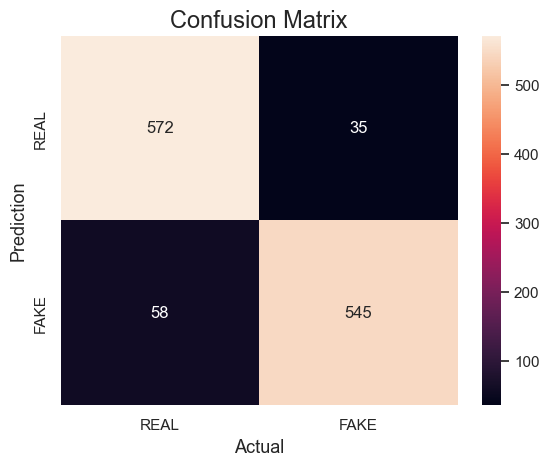

In [53]:
sns.heatmap(cm, 
            annot=True,
            fmt='g', 
            xticklabels=['REAL','FAKE'],
            yticklabels=['REAL','FAKE'])
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show

#Decision Tree

In [54]:
#importing decision tree function
from sklearn.tree import DecisionTreeClassifier 
  
dt = DecisionTreeClassifier(random_state=0) 
model2=dt.fit(x_train, y_train) 
y_pred=model2.predict(x_test)

In [55]:
#accuracy of decision tree model
import sklearn.metrics
accuracy2=sklearn.metrics.accuracy_score(y_test,y_pred)
print("Accuracy of Decision tree model:",accuracy2)

Accuracy of Decision tree model: 0.7933884297520661


In [56]:
print("Accuracy of trained data:")
print(accuracy_score(y_train, model2.predict(x_train))) 
print("Accuracy of test data:")
print(accuracy_score(y_test, model2.predict(x_test))) 

Accuracy of trained data:
1.0
Accuracy of test data:
0.7933884297520661


In [57]:
#confusion matrix for decision tree model
from sklearn.metrics import confusion_matrix  
cm= confusion_matrix(y_test,y_pred)  
print(cm)

[[479 128]
 [122 481]]


<function matplotlib.pyplot.show(close=None, block=None)>

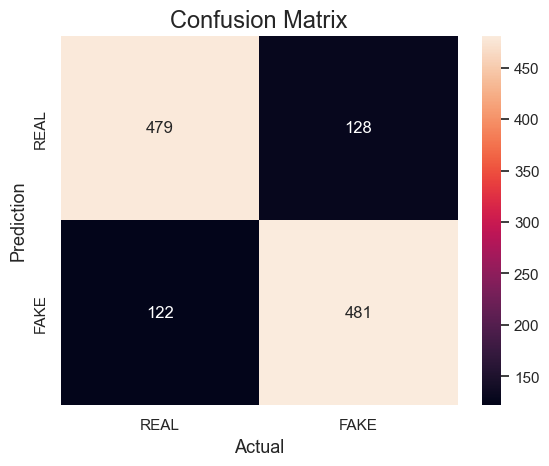

In [58]:
sns.heatmap(cm, 
            annot=True,
            fmt='g', 
            xticklabels=['REAL','FAKE'],
            yticklabels=['REAL','FAKE'])
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show

#RANDOM FOREST MODEL

In [59]:
#importing random forest classifier
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(n_estimators=50, random_state=42)
model3=rf.fit(x_train,y_train)
y_pred=model3.predict(x_test)

In [60]:
#accuracy of random forest classifier
accuracy3=sklearn.metrics.accuracy_score(y_test,y_pred)
print("Accuracy of Random Forest Classifier is:",accuracy3)

Accuracy of Random Forest Classifier is: 0.8917355371900827


In [61]:
print("Accuracy of trained data:")
print(accuracy_score(y_train, model3.predict(x_train))) 
print("Accuracy of test data:")
print(accuracy_score(y_test, model3.predict(x_test))) 

Accuracy of trained data:
1.0
Accuracy of test data:
0.8917355371900827


In [62]:
#classification report 
from sklearn.metrics import accuracy_score, classification_report
classification_rep = classification_report(y_test, y_pred)

In [63]:
print("Classification Report: ",)
print(classification_rep)

Classification Report: 
              precision    recall  f1-score   support

        FAKE       0.89      0.89      0.89       607
        REAL       0.89      0.89      0.89       603

    accuracy                           0.89      1210
   macro avg       0.89      0.89      0.89      1210
weighted avg       0.89      0.89      0.89      1210



In [64]:
#confusion matrix for random forest model
from sklearn.metrics import confusion_matrix  
cm= confusion_matrix(y_test,y_pred)  
print(cm)

[[540  67]
 [ 64 539]]


<function matplotlib.pyplot.show(close=None, block=None)>

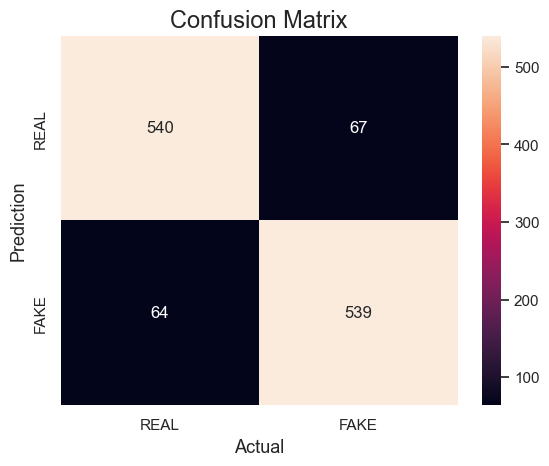

In [65]:
sns.heatmap(cm, 
            annot=True,
            fmt='g', 
            xticklabels=['REAL','FAKE'],
            yticklabels=['REAL','FAKE'])
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show

#PassiveAggressiveClassifier

In [66]:
#importing packages
from sklearn.linear_model import PassiveAggressiveClassifier

In [67]:
#fitting the model
pac=PassiveAggressiveClassifier(max_iter=50, random_state=0)
model4=pac.fit(x_train,y_train)
y_pred=model4.predict(x_test)

In [68]:
#caluculating accuracy
accuracy4=accuracy_score(y_test,y_pred)
print("Accuracy of PassiveAggressiveClassifier model:",accuracy4)

Accuracy of PassiveAggressiveClassifier model: 0.9380165289256198


In [69]:
#confusion matrix 
cm=confusion_matrix(y_test,y_pred)
print(cm)

[[568  39]
 [ 36 567]]


<function matplotlib.pyplot.show(close=None, block=None)>

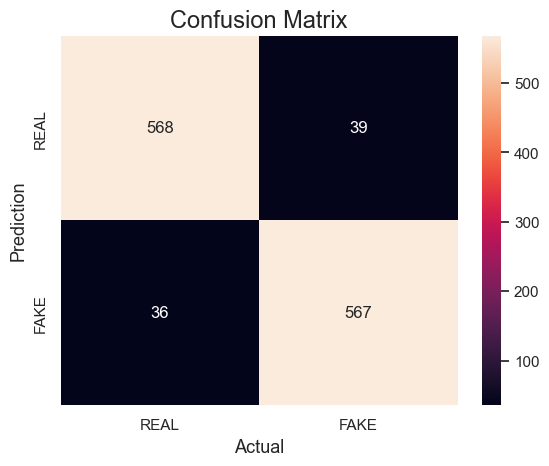

In [70]:
sns.heatmap(cm, 
            annot=True,
            fmt='g', 
            xticklabels=['REAL','FAKE'],
            yticklabels=['REAL','FAKE'])
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show

#NAIVE BAYES MODEL

In [71]:
#importing packages and fitting model
from sklearn.naive_bayes import MultinomialNB
nv= MultinomialNB()
model5=nv.fit(x_train,y_train)
y_pred=model5.predict(x_test)

In [72]:
#caluculating accuracy
accuracy5=accuracy_score(y_test,y_pred)
print("Accuracy of Naive Bayes model:",accuracy5)

Accuracy of Naive Bayes model: 0.8272727272727273


In [73]:
#confusion matrix
cm=confusion_matrix(y_test,y_pred)
print(cm)

[[404 203]
 [  6 597]]


<function matplotlib.pyplot.show(close=None, block=None)>

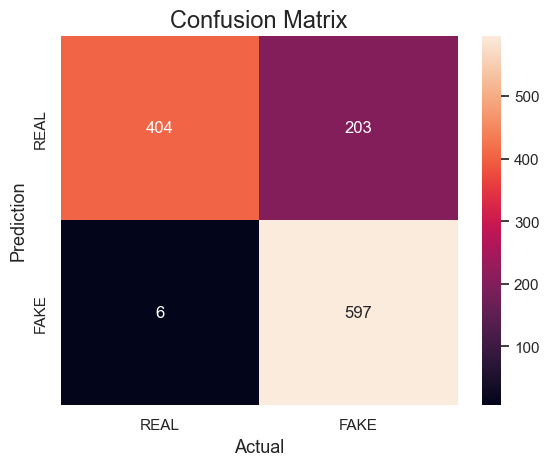

In [74]:
sns.heatmap(cm, 
            annot=True,
            fmt='g', 
            xticklabels=['REAL','FAKE'],
            yticklabels=['REAL','FAKE'])
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show

#SVM MODEL

In [75]:
#importing functions
from sklearn import model_selection,svm

In [76]:
#fitting SVM Model
svm=svm.SVC(C=1.9,kernel="linear")
model6=svm.fit(x_train,y_train)
y_pred=model6.predict(x_test)

In [77]:
#calculating accuracy
accuracy6=accuracy_score(y_test,y_pred)
print("Accuracy of SVM Model:",accuracy6)

Accuracy of SVM Model: 0.9396694214876034


#COMPARING ACCURACY

In [78]:
#creating accuracy dataframe
accuarcy_list=pd.DataFrame({'Models':['Logistic Regression','Decision Tree','Random Forest',
                                    'PassiveAggressiveClassifier','Naive Bayes','SVM'],
                            'Accuracy':[accuracy1*100,accuracy2*100,
                                        accuracy3*100,accuracy4*100,
                                        accuracy5*100,accuracy6*100]})

This dataframe contains accuracy of all models.

In [79]:
print(accuarcy_list)

                        Models   Accuracy
0          Logistic Regression  92.314050
1                Decision Tree  79.338843
2                Random Forest  89.173554
3  PassiveAggressiveClassifier  93.801653
4                  Naive Bayes  82.727273
5                          SVM  93.966942


<BarContainer object of 6 artists>

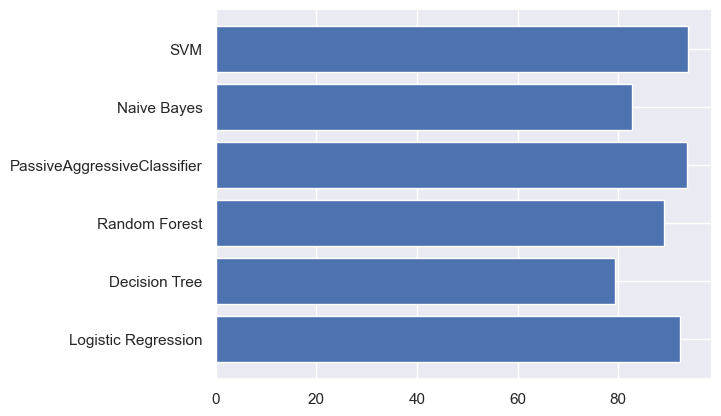

In [80]:
#visualizing accuracy graph
plt.barh(accuarcy_list['Models'],accuarcy_list['Accuracy'])

This graph shows that SVM has highest accuracy among all the models.

#STORING MODEL WITH HIGHEST ACCURACY

SVM got highest accuracy, so using pickle and joblib we are storing SVM Model.

In [81]:
#importing joblib to save model
import joblib

In [82]:
#dumping model
#joblib.dump(model6,'FakeNews_detector.pkl')

.pkl File is created

In [83]:
#loading the model
final_model=joblib.load('FakeNews_detector.pkl')

In [84]:
#predicting value using model
final_y=final_model.predict(x_test)

The loaded model will predict.

In [85]:
#checking final accuracy
final_acc=accuracy_score(y_test,final_y)
print("Accuracy:",final_acc)

Accuracy: 0.9396694214876034


In [113]:
#joblib.dump(vectorization, open('vector.pkl', 'wb'))

In [114]:
vector_form = joblib.load(open('vector.pkl', 'rb'))

#TEST CASES

In [112]:
val=x_test[8]
out=model6.predict(val)
print(out[0])

FAKE


In [109]:
val=x_test[47]
out=model6.predict(val)
print(out[0])

REAL


In [107]:
val=x_test[49]
out=model6.predict(val)
print(out[0])

REAL


In [105]:
val=x_test[37]
out=model6.predict(val)
print(out[0])

REAL


#PREDICTION SYSTEM

In [87]:
import re
def wordopt(text):
    text=text.lower()
    text=re.sub('\[,*?\]','',text)
    text=re.sub('\\W','',text)
    text=re.sub('https?://\S+|www\.\S+','',text)
    text=re.sub('<,*?>+','',text)
    #text=re.sub('[%s]',% re.escape(string.punctuation),'',text)
    text=re.sub('\n','',text)
    text=re.sub('\w*\d\w*','',text)
    return text

In [88]:
#Prediction of news
def testing(news):
    t={"text":[news]}
    df_test=pd.DataFrame(t)
    df_test['text']=df_test['text'].apply(wordopt)
    newx=df_test['text']
    newxv=vectorization.transform(newx)
    prediction=final_model.predict(newxv)
    return prediction[0]

In [90]:
news1=input()
print(news1)
print(testing(news1))

It's primary day in New York and front-runners Hillary Clinton and Donald Trump are leading in the polls.  Trump is now vowing to win enough delegates to clinch the Republican nomination and prevent a contested convention. But Sens.Ted Cruz, R-Texas, Bernie Sanders, D-Vt., and Ohio Gov. John Kasich and aren't giving up just yet.  A big win in New York could tip the scales for both the Republican and Democratic front-runners in this year's race for the White House. Clinton and Trump have each suffered losses in recent contests, shifting the momentum to their rivals.  ""We have won eight out of the last nine caucuses and primaries! Cheer!"" Sanders recently told supporters.  While wins in New York for Trump and Clinton are expected, the margins of those victories are also important.  Trump needs to capture more than 50 percent of the vote statewide if he wants to be positioned to win all of the state's 95 GOP delegates. That would put him one step closer to avoiding a contested conventio